In [1]:
#1 import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, mixture
from sklearn.cluster import KMeans
import category_encoders as ce
import seaborn as sns
import random
%matplotlib inline

In [2]:
data = pd.read_csv('MLeague_players.csv')

In [3]:
data['総局数/試合数'] = data['総局数'] / data['試合数']

KeyError: '総局数'

In [ ]:
data['総局数/試合数'].hist()

In [15]:
data = data.sort_values('総局数/試合数',ascending=False)

In [4]:
data.columns

Index(['チーム', '選手名', '園田 賢', '村上 淳', '鈴木 たろう', '丸山 奏子', '二階堂 亜樹', '勝又 健志',
       '松ヶ瀬 隆弥', '二階堂 瑠美', '内川 幸太郎', '岡田 紗佳', '沢崎 誠', '堀 慎吾', '滝沢 和典',
       '佐々木 寿人', '高宮 まり', '伊達 朱里紗', '多井 隆晴', '白鳥 翔', '松本 吉弘', '日向 藍子', '魚谷 侑未',
       '近藤 誠一', '茅森 早香', '東城 りお', '萩原 聖人', '瀬戸熊 直樹', '黒沢 咲', '本田 朋広', '小林 剛',
       '朝倉 康心', '石橋 伸洋', '瑞原 明奈'],
      dtype='object')

In [5]:
data.head()

,チーム,選手名,園田 賢,村上 淳,鈴木 たろう,丸山 奏子,二階堂 亜樹,勝又 健志,松ヶ瀬 隆弥,二階堂 瑠美,...,茅森 早香,東城 りお,萩原 聖人,瀬戸熊 直樹,黒沢 咲,本田 朋広,小林 剛,朝倉 康心,石橋 伸洋,瑞原 明奈
0,MLeague_stats2021-11-10,試合数,7.0,6.0,6.0,3.0,4.0,6.0,7.0,5.0,...,4.0,5.0,6.0,6.0,5.0,5.0,5.0,7.0,5.0,5.0
1,MLeague_stats2021-11-10,総局数,78.0,63.0,67.0,29.0,51.0,71.0,75.0,58.0,...,44.0,55.0,76.0,64.0,57.0,59.0,61.0,89.0,55.0,48.0
2,MLeague_stats2021-11-10,ポイント,64.9,-250.8,40.0,83.2,30.0,233.0,108.4,27.4,...,-45.3,-30.9,-109.7,60.9,-88.9,-37.4,-75.1,75.1,-68.9,92.7
3,MLeague_stats2021-11-10,平着,2.28,3.33,2.33,1.66,2.25,1.5,2.14,2.4,...,2.75,3.0,3.0,2.33,3.0,2.7,3.0,2.14,2.8,1.8
4,MLeague_stats2021-11-10,1位,2.0,1.0,3.0,2.0,1.0,4.0,3.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0


In [6]:
data.index = data['選手名']
data[['選手名','試合数']].sort_values('試合数',ascending=True).plot(kind='barh',figsize=(10,5))

KeyError: "['試合数'] not in index"

<AxesSubplot:ylabel='選手名'>

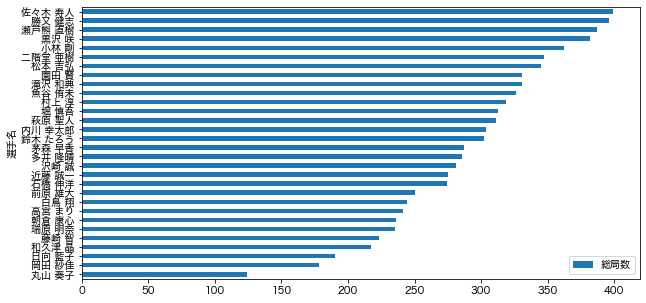

In [19]:
data[['選手名','総局数']].sort_values('総局数',ascending=True).plot(kind='barh',figsize=(10,5))

In [22]:
#グラフ用の色分けの設定
color_dict = dict({'u-next':'cyan',
                   'dribens':'lime',
                   'konami':'green',
                   'furinkazan':'red',
                   'sega_sammy':'blue',
                   'raiden':'orange',
                   'sakura':'pink',
                   'abemas':'olive'
                  })

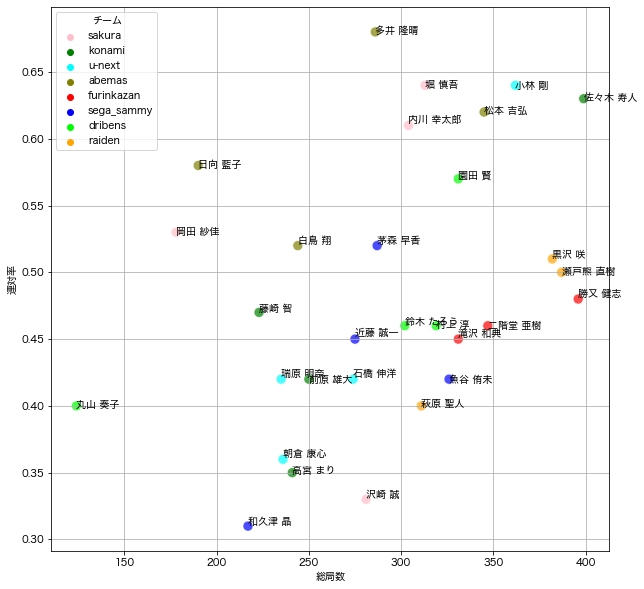

In [23]:
#チーム別で色分けしたプロット
# fig,ax = plt.subplots(figsize=(14,11))
plt.figure(figsize=(10,10))
sns.scatterplot(x='総局数',y='連対率',data=data,s=100,hue='チーム',alpha=0.7,palette=color_dict,sizes=(10,250))
for x, y, name in zip(data['総局数'], data['連対率'], data['選手名']):
    plt.text(x+random.randint(-10,10)*0.0005, y+random.randint(-10,10)*0.0003, name)
plt.grid()
plt.savefig('総局数_vs_連対率_散布図.png')

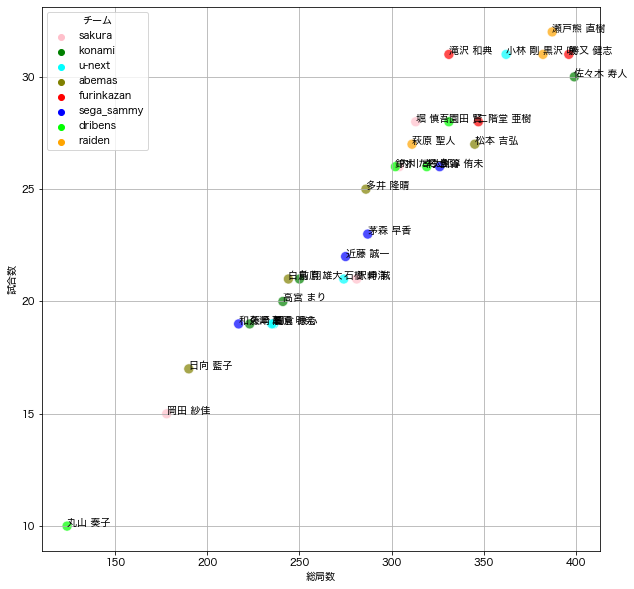

In [24]:
#チーム別で色分けしたプロット
# fig,ax = plt.subplots(figsize=(14,11))
plt.figure(figsize=(10,10))
sns.scatterplot(x='総局数',y='試合数',data=data,s=100,hue='チーム',alpha=0.7,palette=color_dict,sizes=(10,250))
for x, y, name in zip(data['総局数'], data['試合数'], data['選手名']):
    plt.text(x+random.randint(-10,10)*0.0005, y+random.randint(-10,10)*0.0003, name)
plt.grid()

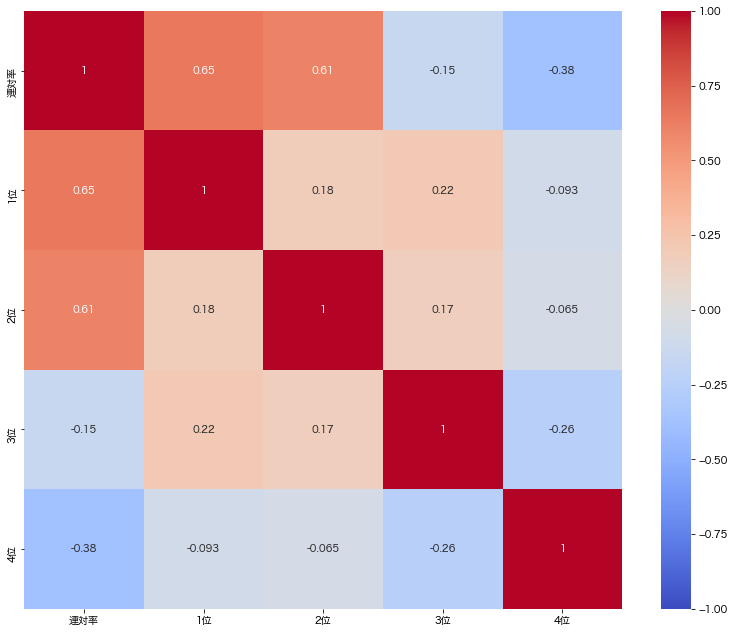

In [52]:
fig,ax = plt.subplots(figsize=(14,11))
sns.heatmap(data[['連対率','1位','2位','3位','4位']].corr(),square=True,vmax=1,vmin=-1,center=0,robust=True,annot=True,cmap='coolwarm')
plt.savefig('連対率と順位の相関.png')

In [26]:
data['アガリ率と放銃率の差']=data['アガリ率']-data['放銃率']

In [27]:
data[['連対率','ポイント','平着']].sort_values('連対率',ascending=False)

,連対率,ポイント,平着
選手名,,,
多井 隆晴,0.68,234.4,2.27
小林 剛,0.64,337.5,2.19
堀 慎吾,0.64,275.6,2.21
佐々木 寿人,0.63,494.1,2.10
松本 吉弘,0.62,272.5,2.25
内川 幸太郎,0.61,468.7,2.13
日向 藍子,0.58,38.1,2.35
園田 賢,0.57,-28.7,2.53
岡田 紗佳,0.53,33.6,2.46


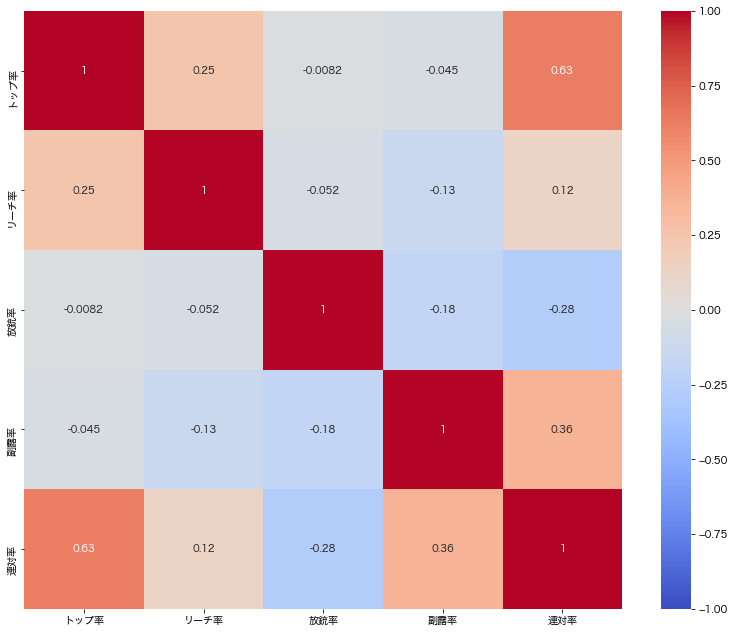

In [51]:
fig,ax = plt.subplots(figsize=(14,11))
sns.heatmap(data[['トップ率','リーチ率','放銃率','副露率','連対率']].corr(),square=True,vmax=1,vmin=-1,center=0,robust=True,annot=True,cmap='coolwarm')
plt.savefig('トップ率相関.png')

<AxesSubplot:ylabel='選手名'>

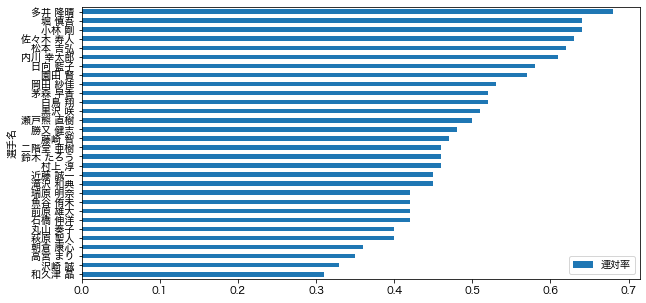

In [29]:
data[['連対率']].sort_values('連対率',ascending=True).plot(kind='barh',figsize=(10,5))

In [30]:
group = data.groupby('チーム').agg('mean')

In [31]:
group

,試合数,総局数,ポイント,平着,1位,2位,3位,4位,トップ率,連対率,ラス回避率,ベストスコア,平均打点,副露率,リーチ率,アガリ率,放銃率,放銃平均打点,総局数/試合数,アガリ率と放銃率の差
チーム,,,,,,,,,,,,,,,,,,,,
abemas,22.5,266.25,163.675000,2.312500,6.250000,7.500000,4.250000,4.500000,0.272500,0.600000,0.7975,58550.0,6893.605000,0.225000,0.205000,0.200000,0.110000,5052.637500,11.753324,0.090000
dribens,22.5,269.00,-0.800000,2.555000,6.000000,5.000000,5.500000,6.000000,0.252500,0.472500,0.7100,54975.0,6680.555000,0.217500,0.197500,0.182500,0.115000,5709.750000,12.026511,0.067500
furinkazan,30.0,358.00,-36.266667,2.560000,6.666667,7.333333,8.333333,7.666667,0.216667,0.463333,0.7400,59300.0,6637.886667,0.173333,0.190000,0.200000,0.093333,5887.876667,11.948157,0.106667
konami,22.5,278.25,-42.125000,2.572500,5.750000,5.250000,5.500000,6.000000,0.230000,0.467500,0.7175,64150.0,6168.367500,0.192500,0.225000,0.187500,0.117500,6230.965000,12.247901,0.070000
raiden,30.0,360.00,-70.166667,2.566667,7.333333,7.000000,7.333333,8.333333,0.236667,0.470000,0.7100,63600.0,6959.610000,0.106667,0.213333,0.176667,0.106667,6024.153333,11.978283,0.070000
sakura,22.5,269.00,124.325000,2.412500,7.000000,5.250000,5.000000,5.250000,0.295000,0.527500,0.7525,72500.0,6628.295000,0.212500,0.205000,0.197500,0.105000,5215.112500,12.029625,0.092500
sega_sammy,22.5,276.25,-99.175000,2.597500,5.750000,4.000000,6.500000,6.250000,0.252500,0.425000,0.7050,52050.0,7194.002500,0.175000,0.210000,0.160000,0.105000,5909.322500,12.234444,0.055000
u-next,22.5,276.75,-66.075000,2.605000,3.750000,7.250000,6.750000,4.750000,0.160000,0.460000,0.7575,49675.0,5869.520000,0.242500,0.230000,0.200000,0.092500,5795.302500,12.378628,0.107500


<AxesSubplot:xlabel='チーム'>

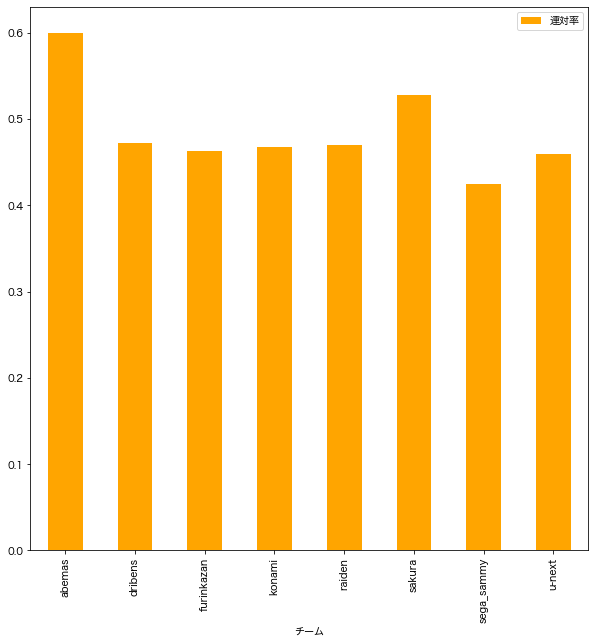

In [32]:
group[['連対率']].plot(kind='bar',color='orange',figsize=(10,10))

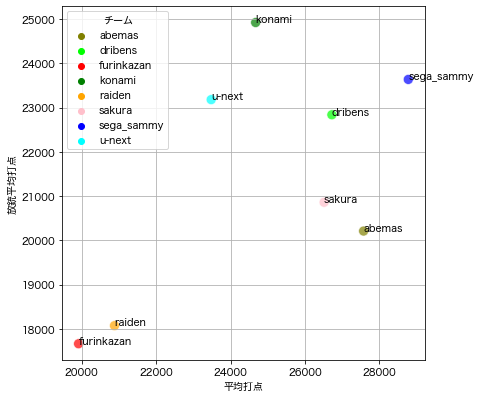

In [45]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))

#グラフ用の色分けの設定
color_dict = dict({'u-next':'cyan',
                   'dribens':'lime',
                   'konami':'green',
                   'furinkazan':'red',
                   'sega_sammy':'blue',
                   'raiden':'orange',
                   'sakura':'pink',
                   'abemas':'olive'
                  })

sns.scatterplot(x="平均打点", y='放銃平均打点',data=group,s=100,hue='チーム',alpha=0.7,palette=color_dict)
for x, y, name in zip(group['平均打点'], group['放銃平均打点'], group.index):
    plt.text(x, y, name)
plt.grid()
plt.savefig('打点散布図.png')

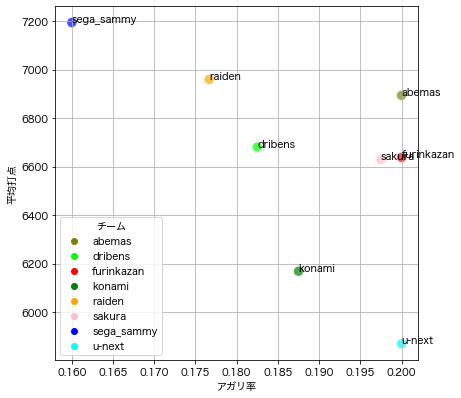

In [35]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))

#グラフ用の色分けの設定
color_dict = dict({'u-next':'cyan',
                   'dribens':'lime',
                   'konami':'green',
                   'furinkazan':'red',
                   'sega_sammy':'blue',
                   'raiden':'orange',
                   'sakura':'pink',
                   'abemas':'olive'
                  })

sns.scatterplot(x="アガリ率", y='平均打点',data=group,s=100,hue='チーム',alpha=0.7,palette=color_dict)
for x, y, name in zip(group['アガリ率'], group['平均打点'], group.index):
    plt.text(x, y, name)
plt.grid()
plt.savefig('corr_agari_get.png')

In [36]:
group = data.groupby('チーム').sum()

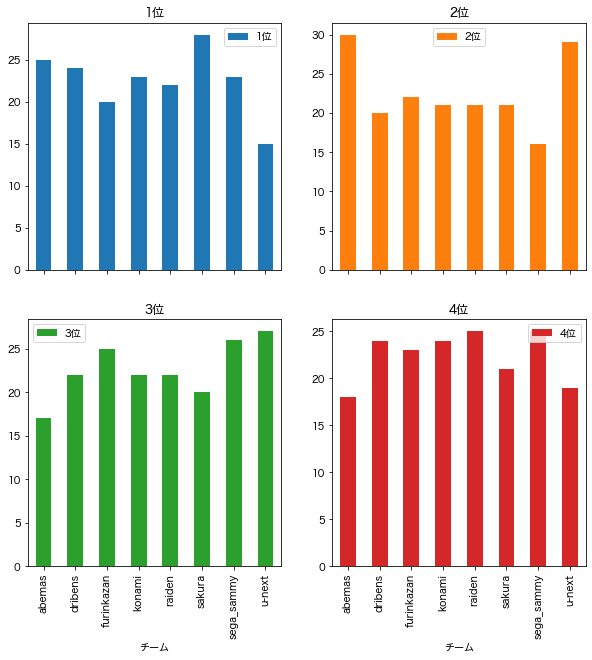

In [37]:
group[['1位','2位','3位','4位']].plot(kind='bar',figsize=(10,10),subplots=True, layout=(2, 2))
plt.savefig('順位.png')

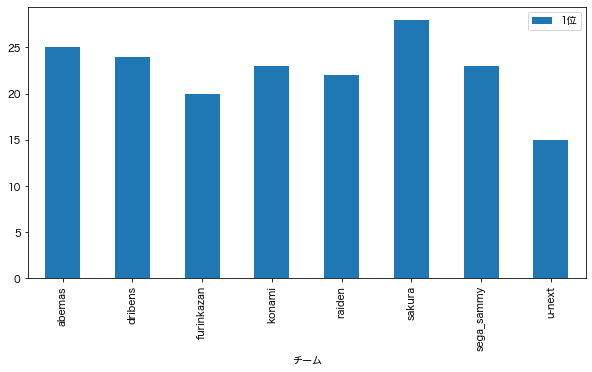

In [38]:
group[['1位']].plot(kind='bar',figsize=(10,5))
plt.savefig('順位1.png')

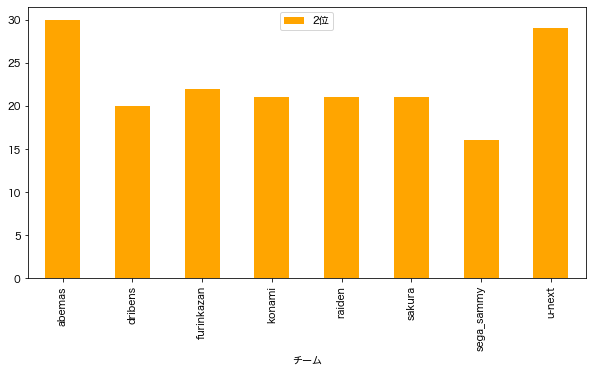

In [39]:
group[['2位']].plot(kind='bar',figsize=(10,5),color = 'orange')
plt.savefig('順位2.png')

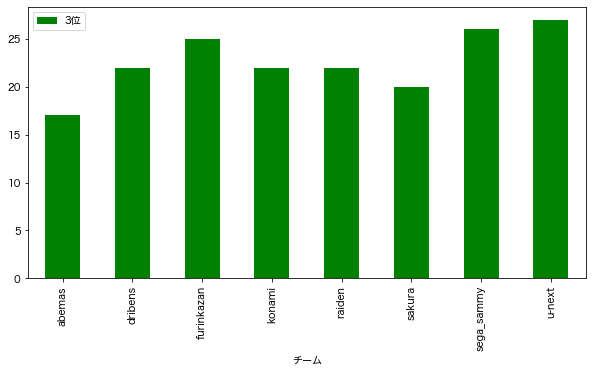

In [40]:
group[['3位']].plot(kind='bar',figsize=(10,5),color = 'green')
plt.savefig('順位3.png')

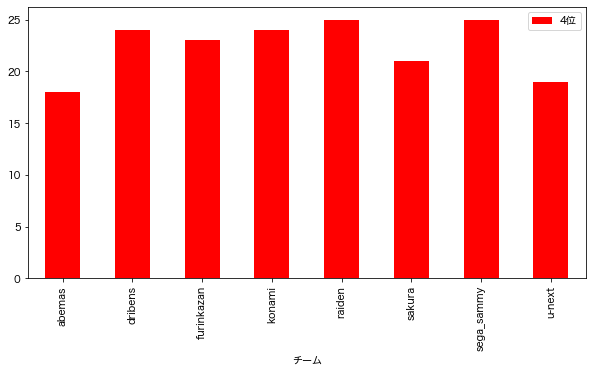

In [41]:
group[['4位']].plot(kind='bar',figsize=(10,5),color = 'red')
plt.savefig('順位4.png')

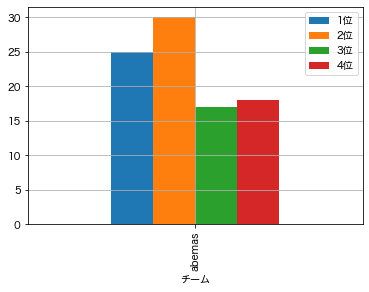

In [42]:
group_r=group[group.index=='abemas']
group_r[['1位','2位','3位','4位']].plot(kind='bar')
plt.grid()
plt.savefig('rank_abemas.png')

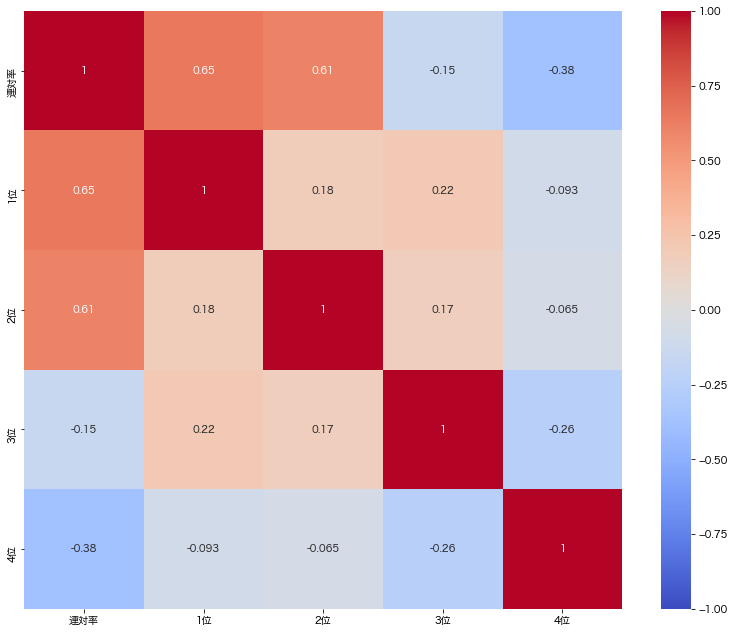

In [43]:
fig,ax = plt.subplots(figsize=(14,11))
sns.heatmap(data[['連対率','1位','2位','3位','4位']].corr(),square=True,vmax=1,vmin=-1,center=0,robust=True,annot=True,cmap='coolwarm')
plt.savefig('連対率と順位の相関.png')

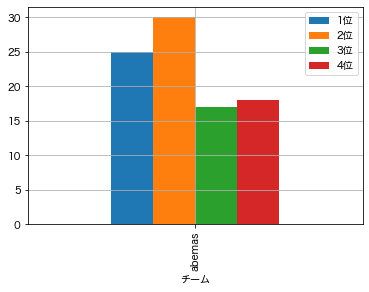

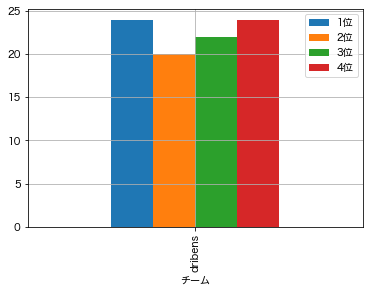

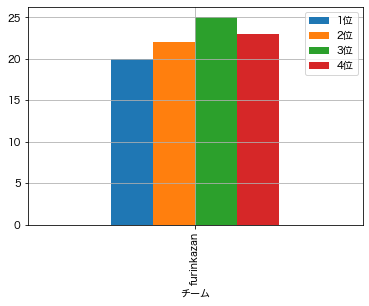

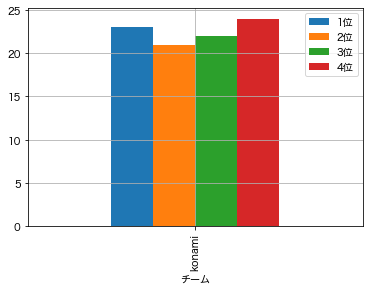

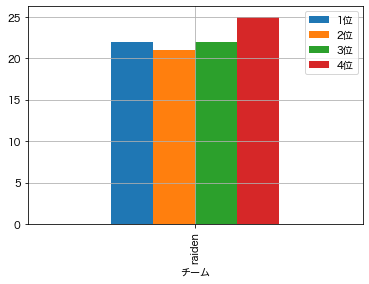

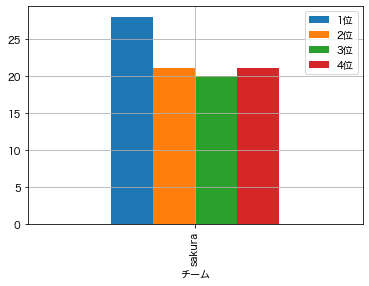

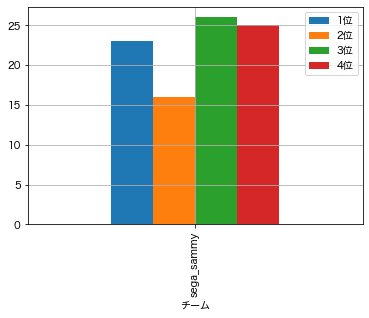

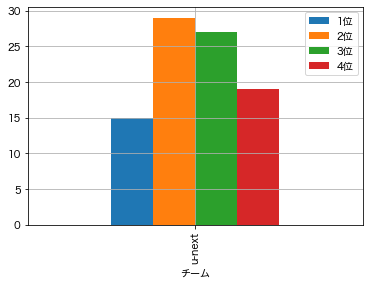

In [49]:
for i in group.index:
    group_r=group[group.index==i]
    group_r[['1位','2位','3位','4位']].plot(kind='bar')
    plt.grid()
    plt.savefig(i+'.png')

In [14]:
data['村上 淳'].index

Index(['試合数', '総局数', 'ポイント', '平着', '1位', '2位', '3位', '4位', 'トップ率', '連対率',
       ...
       '連対率', 'ラス回避率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率',
       '放銃平均打点', 'チーム'],
      dtype='object', name='選手名', length=513)